# Linear Regression using Gradient Descent

## Linear Regression by implementing of gradient descent algorithm

The linear regression line is defined as $$y = \theta_0 + \theta_1 x $$

The parameters $\theta_0$ and $\theta_1$ can be computed using gradeint descent algorithm.

Gradeint descent algorithm is given as:


repeat until convergence {
\begin{align*}
    \theta_1 &= \theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m} \big ( h_\theta (x^{(i)}) - y^{(i)} \big ) * x^{(i)} \\
    \theta_0 &= \theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m} \big ( h_\theta (x^{(i)}) - y^{(i)} \big )
\end{align*}
}

Reference: https://towardsdatascience.com/

### Step 1: Import libraries and dataset

In [ ]:
## Import all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline


In [ ]:
## Import the dataset

data = pd.read_csv('salary_data.csv')
# change the path as necessary

X = data.iloc[:, 0]
Y = data.iloc[:, 1]

# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)

(30,)
(30,)


### Step 2: EDA , Preprocessing , Create the training data

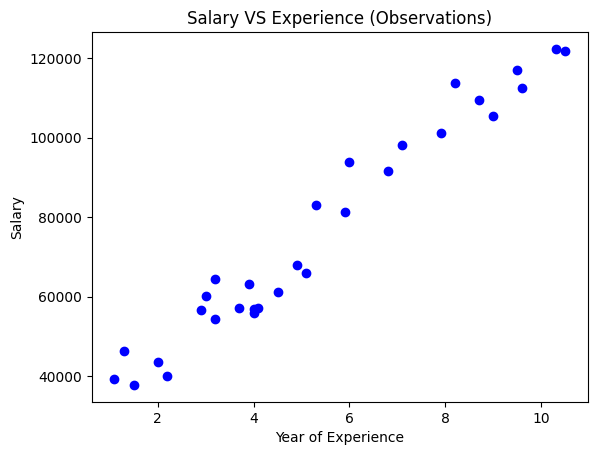

In [ ]:
# Visualize the dataset

plt.scatter(X, Y, color='blue')
plt.title('Salary VS Experience (Observations)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
# Split the data into train vs test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Step 2 is skipped.


### Step 3: Train the machine learning model

In [ ]:
# Build the model


theta1 = 0
theta0 = 0
#Y_pred = theta1 * X + theta0
alpha = 0.0001  # Learning Rate
epochs = 10000  # Number of iterations to perform gradient descent

m = float(len(X_train)) # Number of elements in X

cost_history = []

cost_onTestData_history = []

# Performing Gradient Descent
for i in range(epochs):
    Y_pred = theta1 * X_train + theta0
    Y_Test_pred = theta1 * X_test + theta0

    temp1 = (-1/m) * sum(X_train * (y_train - Y_pred))
    temp0 = (-1/m) * sum(y_train - Y_pred)
    theta1 = theta1 - alpha * temp1
    theta0 = theta0 - alpha * temp0

    costTrain = (1/2*m) * sum((y_train - Y_pred)**2)
    costTest = (1/2*m) * sum((y_test - Y_Test_pred)**2)

    cost_history.append(costTrain)
    cost_onTestData_history.append(costTest)



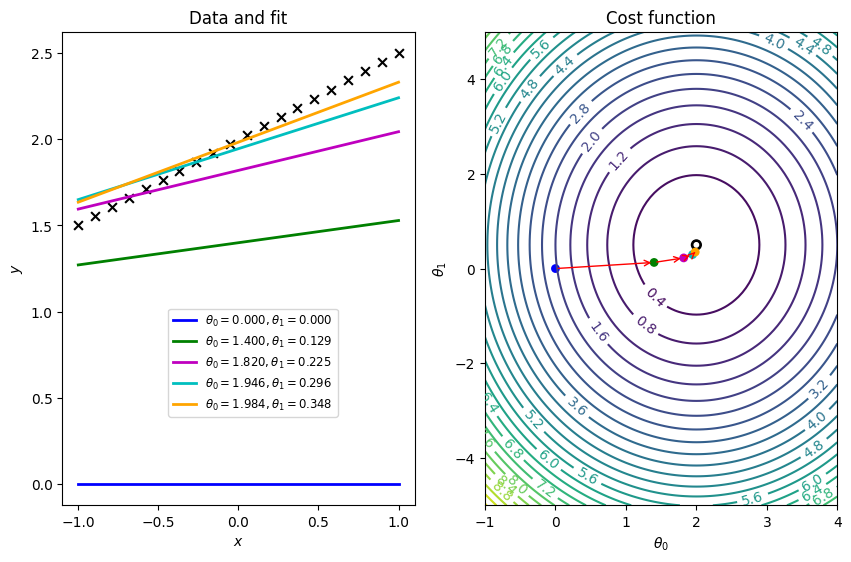

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

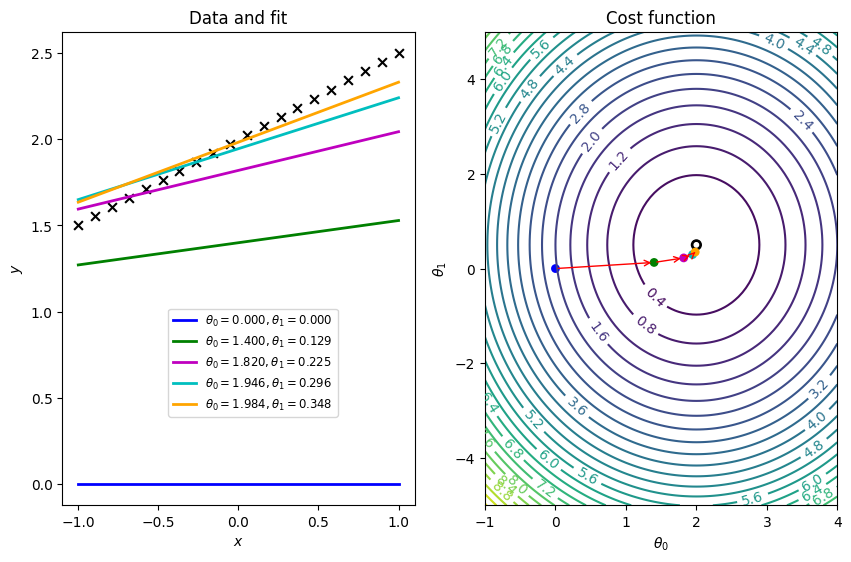

In [ ]:
#Effect of Hyperparameters in the convergence
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
degree = 1
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    if(degree==1):
       # """Our "hypothesis function -1 ",  a straight line."""
        return theta0 + theta1*x
    if(degree==2):
        #"""Our "hypothesis function -2 ", a quadratic curve."""
        return theta0 + theta1*x*x
    if(degree==3):
        #"""Our "hypothesis function -3 ", a polynomial curve of degree 3."""
        return theta0 + theta1*x*x*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()

### Step 4: Visualize the results

In [ ]:
# The coefficients

# print the parameter theta1
print('Theta1 = ', theta1)
# print the parameter theta0
print('Theta0 = ', theta0)
#Salary = 6735 + 12180 Years of Experience


Theta1 =  12180.083954896392
Theta0 =  6735.411768176466


### Step 5: Prediction

In [ ]:
# Predict the values for the given X
Y_pred = theta1 * X_train + theta0
Y_pred

28    132190.276504
24    112702.142176
12     55455.747588
0      20133.504119
4      33531.596469
16     68853.839938
5      42057.655237
13     56673.755983
11     55455.747588
22    102958.075012
1      22569.520910
2      25005.537701
25    116356.167362
3      31095.579678
21     93214.007848
26    122446.209340
18     78597.907102
29    134626.293295
20     89559.982661
7      45711.680424
10     54237.739192
14     61545.789565
19     79815.915498
6      43275.663633
Name: YearsExperience, dtype: float64

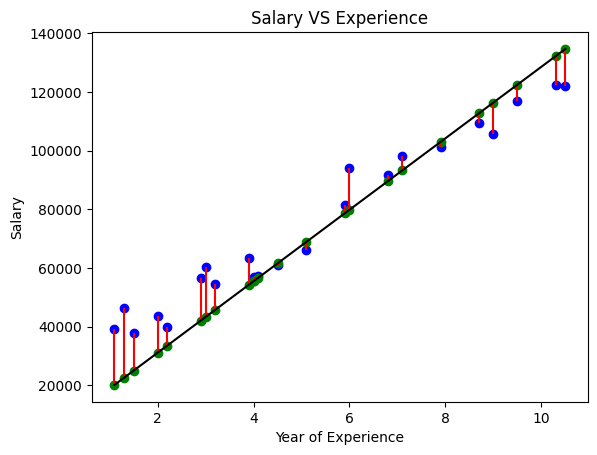

In [ ]:
# Visualize the dataset and plot the residuals

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, color='blue')       # observed values
ax.scatter(X_train, Y_pred, color='green') # predicted values
ax.vlines(X_train,y_train, Y_pred, color='red')  # residual lines
plt.plot([min(X_train), max(X_train)], [min(Y_pred), max(Y_pred)], color='black')  # regression line

plt.title('Salary VS Experience')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

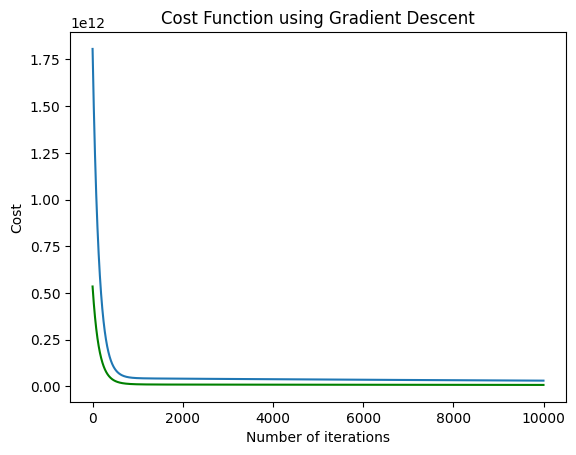

In [ ]:
# plot the cost function

plt.plot(cost_history)
plt.plot(cost_onTestData_history, color="green")
plt.title('Cost Function using Gradient Descent')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

### Step 6: Model Evalaution & Assessment using Performance measures

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("Performance on Training Set")
# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(y_train, Y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(y_train, Y_pred))

Performance on Training Set
Mean squared error = 108556738.30
Variance score = 0.86


In [ ]:
# Predict the values for the test data
Y_Test_pred = theta1 * X_test + theta0
print("Performance on Test Set")
# The mean squared error
print("Mean squared error = %.2f" % mean_squared_error(y_test, Y_Test_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score = %.2f' % r2_score(y_test, Y_Test_pred))

Performance on Test Set
Mean squared error = 115824890.93
Variance score = 0.77
